<a href="https://colab.research.google.com/github/hoiyurie/tibame-ml0602/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
#DateFrame : 表格 Serise：一行/一列

iris = load_iris()  
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df["ans"]=iris["target"]
df # 直接寫df比print（df）排版好看
df.to_csv("iris.csv",encoding="utf-8",index=False)  # 不要前面的index
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# sklearn前：用pandas.DataFrame
# sklearn後：用np.array

import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(["ans"],axis=1)),np.array(df["ans"])
# 90% x,10%x, 90%y, 10%y
x_train,x_test,y_train,y_test = train_test_split (x,
                                                  y,
                                                  test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)  # fit資料喂進去


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 498.3, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [48, 45, 42]\nclass = setosa'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 87\nvalue = [0, 45, 42]\nclass = versicolor'),
 Text(171.69230769230768, 317.1, 'petal length (cm) <= 4.95\ngini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(85.84615384615384, 226.5, 'petal width (cm) <= 1.65\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]\nclass = versicolor'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = versicolor'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(214.615384

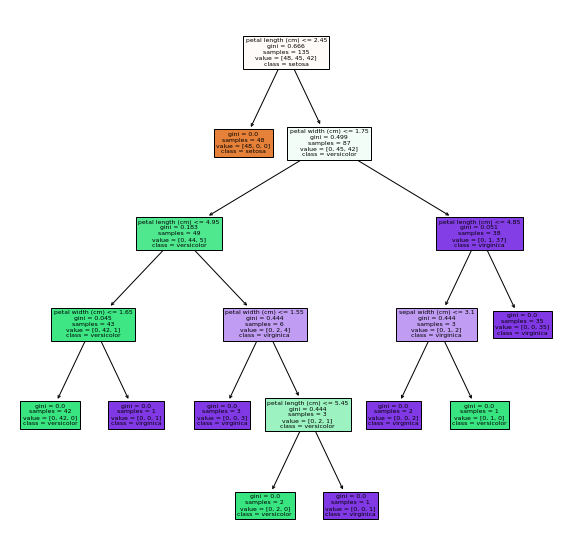

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)